<a href="https://colab.research.google.com/github/joaovictordds/joaovictordds/blob/main/codigos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atalho de códigos para realização de processamento, tratamento, manipulação, exploração e análise de dados

##### Carregar dados

Carregando dados simples de bases pequenas, do tipo csv:

In [ ]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
gorjetas = sns.load_dataset('tips') # Dataset existente em seaborn para exemplo

In [ ]:
pd.DataFrame(novoconjdados) # CRIA UM CONJUNTO DE DADOS
gorjetas.T # Transpões os dados. Linha vira coluna e coluna vira linha
pd.concat([novoconjdados, gorjetas], axis=1) # JUNTA DUAS TABELAS EM QUE AS COLUNAS FICAM LADO A LADO.

##### Analisando o conteudo do dataset:

In [ ]:
gorjetas.head(5) #lê as primeiras linhas do dataset
gorjetas.sample(3) # lê umas amostra aleatoria do ds
gorjetas.info() # mostra os nomes das variaveis, dados faltantes e tipo de dados das colunas
gorjetas.describe() #breve estatisticas das colunas numericas
gorjetas['tip'].describe() #breve estatisticas da coluna(s) selecionada.
gorjetas.shape # MOSTRA A QTDE DE LINHAS E COLUNAS DO DATASET
gorjetas.sample(100).to_csv('amostra.csv',sep=';') # Cria um DF para breve análise das variaveis
gorjetas['sex'].value_counts() # Conta os valores na coluna selecionada

##### Manipulação de dados

In [ ]:

gorjetas[['tip','day']] # Selecionando algumas colunas
gorjetas[gorjetas['size'] <= 2] # selecionando valores dentro das variaveis
gorjetas[(gorjetas['tip'] <= 2 ) & (gorjetas['sex'] == 'Female')] # Duas condições ==> utilizar &
gorjetas.loc[gorjetas['tip'] >=2].loc[gorjetas['sex'] =='Female'].loc[gorjetas['smoker'] == 'No'] # localiza em gorjetas, sexo e fumante
gorjetas.rename(columns={"total_bill":"valor_gorjeta","sex":"sexo"}) #altera o nome das colunas selecionadas

In [ ]:
gorjetas.iloc[3:,:] # BUSCA OS DADOS INDEXADOS NUMERICAMENTE. EX: BUSCA OS DADOS DA TERCEIRA LINHA EM DIANTE E TODAS AS COLUNAS
gorjetas.loc['Dinner', :] # LOCALIZA AS INFORMAÇÕES DE DINNER ESPECIFICAMENTE
gorjetas.groupby(gorjetas['smoker']).describe().T # AGRUPA DADOS DE ACORDO COM A SOLICITAÇÃO EX: .mean(). Pode ter varias formas de agrupar.

In [ ]:
gorjetas['tip'] = gorjetas['tip'].str.replace('.',',') # subs ponto para virgula
gorjetas['size'] = gorjetas['size'].astype(np.float32, copy=False) #conversão p/float
gorjetas.drop_duplicates(subset="sex", keep='first',inplace=True) # Excluindo duplicados - keep mantem o primeiro
gorjetas[gorjetas.duplicated(['day'],keep=False)] # localizando duplicados na coluna a ser tratada

In [ ]:
gorjetas.isnull().sum() # Verificando dados faltantes
gorjetas['total_bill'].isnull().sum() # Verificando coluna c/faltante especifica

Tratamento de outliers das variaveis numericas (utlizar 2 desvios padrão)

In [ ]:
# substituindo os outliers pela mediana da coluna
desvio = sts.stdev(gorjetas['total_bill']) # Calculando o desvio padrão dos valores de uma coluna
mediana = sts.median(gorjetas['total_bill'])
gorjetas.loc[(gorjetas['coluna'] < 0 'ou outro parametro') | (gorjetas['Idade'] >= 'parametro') ] = mediana
gorjetas.loc[gorjetas['total_bill'] >=  2 * desvio ] # Verificar se tem algum valor fora do critério (de dois desvios)
gorjetas.loc[gorjetas['total_bill'] >=  2 * desvio, 'total_bill'] = mediana # Realizar a subst. de outliers pela mediana
gorjetas['total_bill'].fillna(mediana, inplace=True) # substitui espaços vazios ela mediana
gorjetas.isnull().sum() #Verificamos se NAN não existem mais

In [ ]:
# PARA DADOS NAN CATEGORICOS
agrupado = gorjetas.groupby(['sex']).size() #
gorjetas['sex'].fillna('Feminino', inplace=True) # substituindo campos vazios pela moda

# dados categoricos necessitam ser substituidos pela moda:
agrupado = gorjetas.groupby(['sex']).size() # localizando a moda, nesse caso, deu Feminino
gorjetas.loc[gorjetas['sex'].isin( ['F','Fem','Fem.']), 'sex'] = "Feminino" # tratando dados


In [ ]:
#Convert DAYS to YEARS
cust_data['EMP_YEARS'] = cust_data.DAYS_EMPLOYED/365
cust_data['AGE'] = cust_data.DAYS_BIRTH/365
cust_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
cust_data.head()

##### Dados gráficos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import sweetviz as sv
my_report = sv.analyze(gorjetas)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

C:\Users\Joao Victor\AppData\Local\Temp\ipykernel_7316\3055178021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gorjetas.groupby(['sex'])['total_bill'].sum().plot.pie(legend = True);


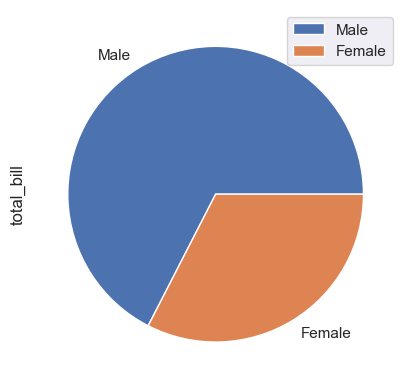

In [ ]:
# Gráfico de pizza - Agrupando os dados baseado nos atributos de uma coluna categorica
gorjetas.groupby(['sex'])['total_bill'].sum().plot.pie(legend = True);

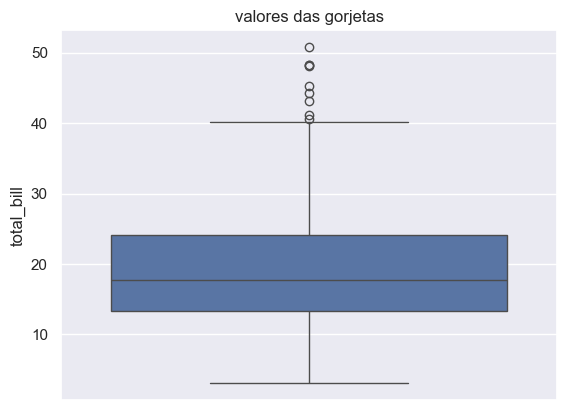

In [ ]:
sns.boxplot(gorjetas.total_bill).set_title('valores das gorjetas');

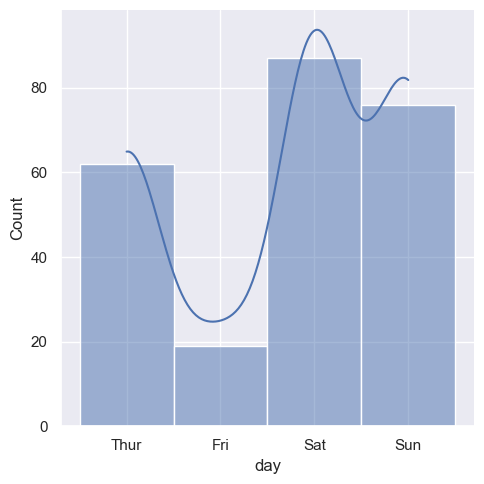

In [ ]:
# visualizando com grafico com uma linha de suavização
sns.displot(gorjetas.day, kde=True); # se colocar False no kde a linha sai de cima

C:\Users\Joao Victor\AppData\Local\Temp\ipykernel_7316\2050815588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gorjetas['total_bill'].groupby(gorjetas['sex']).sum().plot(kind='barh'); # PLOTA UM GRAFICO de barras


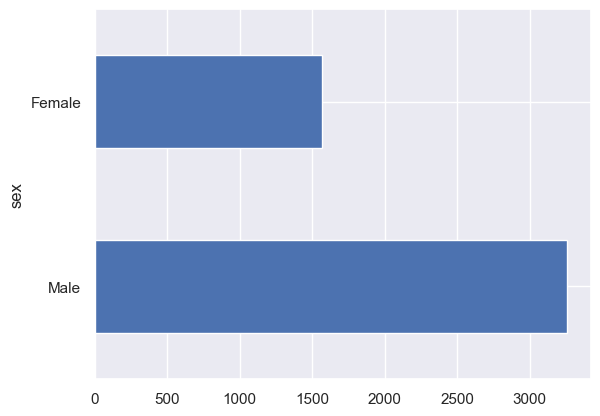

In [ ]:
gorjetas['total_bill'].groupby(gorjetas['sex']).sum().plot(kind='barh'); # PLOTA UM GRAFICO de barras

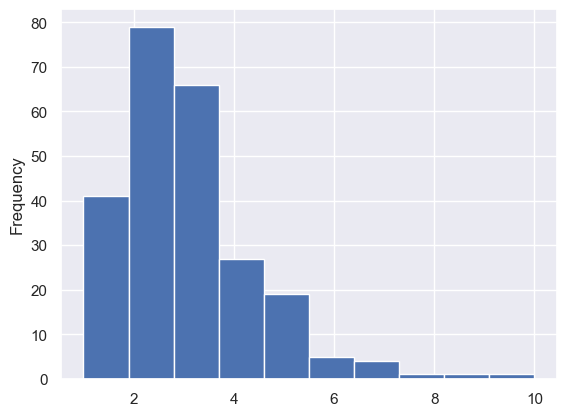

In [ ]:
# Plota graficos de histogramas. kind='hist', edgecolor='black', bins=6
gorjetas['tip'].T.plot(kind='hist');